In [2]:
# set precision
pd.set_option('display.precision', 14)
# import modules
import pandas as pd

# import Co training data using the pandas library and convert them into a dataframe
raw_data = pd.read_excel('data_Co.xlsx')
raw_data.head()

random_state = 1

from sklearn.utils import shuffle
# take the oxygen vacancy as the label
Y = raw_data.loc[:, 'Oxygen vacancy'].values

# take the other collumns as the features
X = raw_data.iloc[:, 3:]


X, y = shuffle(X, Y, random_state=random_state)
X.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site
91,4.84454493355555,2.51282051282051,1.13102564102564,1.43564102564103,0.61
34,5.05902991797449,2.50000000000000,1.14500000000000,1.39450000000000,0.61
105,4.87126828290924,2.50000000000000,1.13500000000000,1.42500000000000,0.61
150,4.97940441689351,2.48453608247423,1.13711340206186,1.40116494845361,0.61
88,7.28825034784337,2.38461538461539,1.20769230769231,1.44000000000000,0.62


In [3]:
# read Fe training data
data_fe = pd.read_excel('data_Fe.xlsx')
Y_fe = data_fe.loc[:, 'Oxygen vacancy'].values

# take the other collumns as the features and do shuffle
X_fe = data_fe.iloc[:, 3:]

X_fe, y_fe = shuffle(X_fe, Y_fe, random_state=random_state)
X_fe.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site
59,8.79477339181286,2.47916666666667,1.16333333333333,1.423,0.64400
74,7.21674769634630,2.68750000000000,1.31375000000000,1.392,0.63420
44,8.10839486119117,2.66666666666667,1.34000000000000,1.440,0.62750
56,3.10584610391043,2.00000000000000,1.08833333333333,1.525,0.66200
88,6.76241241201353,2.66942148760331,1.29181818181818,1.392,0.63755


In [4]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
# Scikit-learn packages
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

reg = ExtraTreesRegressor(n_estimators=100, random_state=random_state)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)



Test R2 score: 0.718446


In [5]:
import seaborn as sns
vis_data = pd.DataFrame.from_records({'pred': predictions, 'label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="label", y="pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

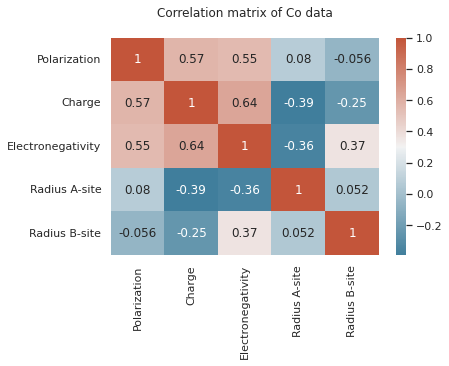

In [6]:
import matplotlib.pyplot as plt
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
# hm = sns.heatmap(X.corr(), cmap=cmap, mask=mask, annot = True)
hm = sns.heatmap(X.corr(), cmap=cmap, annot = True)
hm.set(title = "Correlation matrix of Co data\n")

plt.show()

In [7]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# !pip install xgboost
# !pip install lightgbm
# !pip install lazypredict
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Setting up max columns displayed to 100
# pd.options.display.max_columns = 100

kf = KFold(n_splits=5, random_state=random_state, shuffle=True)
results = []
prediction_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LazyRegressor(predictions=True)
    models, prediction = reg.fit(X_train, X_test, y_train, y_test)
    prediction_list.append(prediction)
    results.append(models)
    
df_concat = pd.concat(results)
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_sorted = df_means.sort_values(by='R-Squared', ascending=False)

df_pred_concat = pd.concat(prediction_list)
by_pred_row_index = df_pred_concat.groupby(df_pred_concat.index)
df_pred_sorted = by_pred_row_index.mean().iloc[:-1, :]

<IPython.core.display.Javascript object>

100%|██████████| 42/42 [00:02<00:00, 18.43it/s]


In [8]:
df_sorted['R-Squared'][0]

0.7096708364006155

([<matplotlib.axis.XTick at 0x7fd810b6e4a8>,
 [Text(0, 0, 'ExtraTreesRegressor'),
  Text(1, 0, 'SVR'),
  Text(2, 0, 'RandomForestRegressor'),
  Text(3, 0, 'GradientBoostingRegressor'),
  Text(4, 0, 'KNeighborsRegressor'),
  Text(5, 0, 'AdaBoostRegressor'),
  Text(6, 0, 'BaggingRegressor'),
  Text(7, 0, 'HistGradientBoostingRegressor'),
  Text(8, 0, 'LGBMRegressor'),
  Text(9, 0, 'XGBRegressor'),
  Text(10, 0, 'ExtraTreeRegressor'),
  Text(11, 0, 'LassoCV'),
  Text(12, 0, 'ElasticNetCV'),
  Text(13, 0, 'LassoLarsCV'),
  Text(14, 0, 'BayesianRidge'),
  Text(15, 0, 'Ridge'),
  Text(16, 0, 'OrthogonalMatchingPursuitCV'),
  Text(17, 0, 'TransformedTargetRegressor'),
  Text(18, 0, 'LinearRegression'),
  Text(19, 0, 'Lars'),
  Text(20, 0, 'LarsCV'),
  Text(21, 0, 'LassoLarsIC'),
  Text(22, 0, 'RidgeCV'),
  Text(23, 0, 'SGDRegressor'),
  Text(24, 0, 'HuberRegressor'),
  Text(25, 0, 'LinearSVR'),
  Text(26, 0, 'DecisionTreeRegressor'),
  Text(27, 0, 'TweedieRegressor'),
  Text(28, 0, 'Generaliz

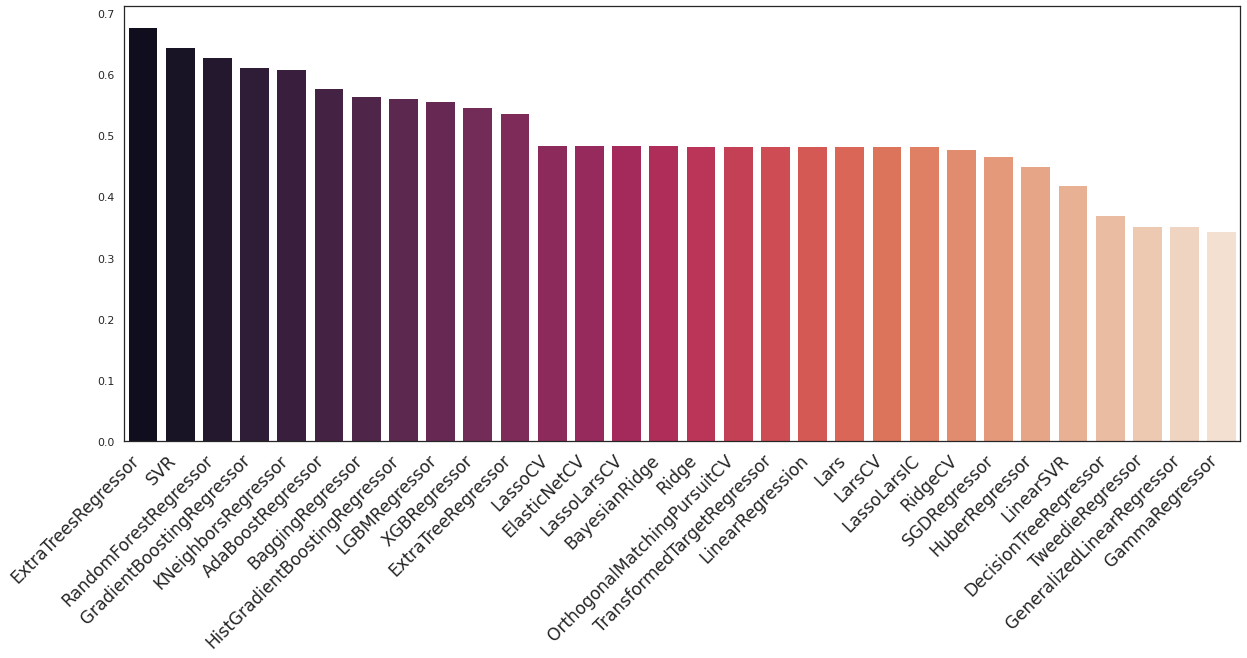

In [9]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(30)), y=list(df_sorted['R-Squared'])[1:31], palette="rocket")
plt.xticks(list(range(30)), list(df_sorted.index)[1:31], rotation=45, fontsize='17', horizontalalignment='right')

In [10]:
df_sorted['R-Squared'][1]

0.677063808164752

<module 'matplotlib.pyplot' from '/home/uqyluo/anaconda3/envs/Chemical/lib/python3.6/site-packages/matplotlib/pyplot.py'>

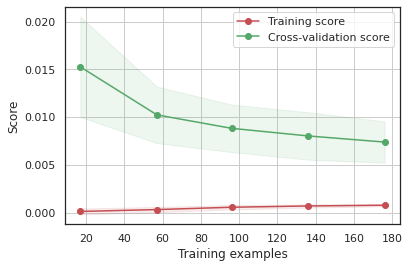

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import numpy as np
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if ylim is not None:
        plt.set_ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring = 'neg_mean_squared_error'
    )
    train_scores = - train_scores
    test_scores = - test_scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return plt

# fig, axes = plt.subplots(3, 1, figsize=(10, 10))
title = "Learning Curves"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=random_state)

estimator =  ExtraTreesRegressor(n_estimators=100, random_state=random_state)
plot_learning_curve(
    estimator, title, X, y, axes=None, cv=cv, n_jobs=4
)


In [13]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
# Scikit-learn packages
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, random_state=random_state)

reg = ExtraTreesRegressor(n_estimators=100, random_state=random_state)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)



Test R2 score: 0.800143


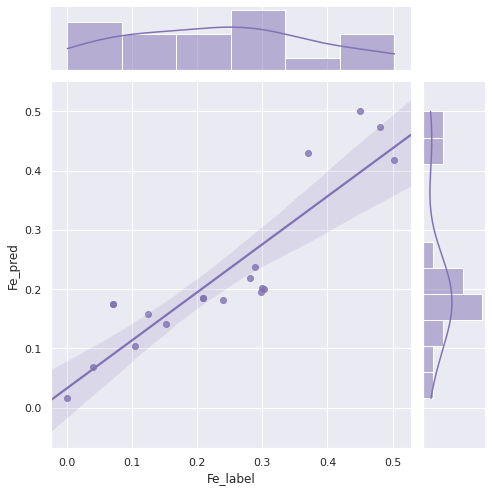

In [14]:
import seaborn as sns
vis_data = pd.DataFrame.from_records({'Fe_pred': predictions, 'Fe_label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Fe_label", y="Fe_pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

<module 'matplotlib.pyplot' from '/home/uqyluo/anaconda3/envs/Chemical/lib/python3.6/site-packages/matplotlib/pyplot.py'>

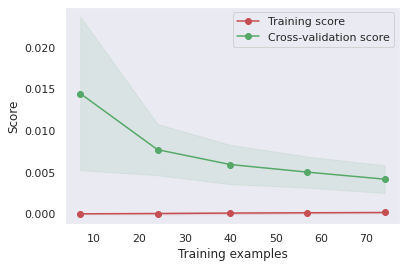

In [15]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=random_state)

estimator =  ExtraTreesRegressor(n_estimators=100, random_state=random_state)
plot_learning_curve(
    estimator, title, X_fe, y_fe, axes=None, cv=cv, n_jobs=4
)